This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. \
There are 25 variables: 

- **ID**: ID of each client
- **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- **SEX**: Gender (1=male, 2=female)
- **EDUCATION**: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- **MARRIAGE**: Marital status (1=married, 2=single, 3=others)
- **AGE**: Age in years
- **PAY_0**: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- **PAY_2**: Repayment status in August, 2005 (scale same as above)
- **PAY_3**: Repayment status in July, 2005 (scale same as above)
- **PAY_4**: Repayment status in June, 2005 (scale same as above)
- **PAY_5**: Repayment status in May, 2005 (scale same as above)
- **PAY_6**: Repayment status in April, 2005 (scale same as above)
- **BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar)
- **BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar)
- **BILL_AMT3**: Amount of bill statement in July, 2005 (NT dollar)
- **BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollar)
- **BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar)
- **BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollar)
- **PAY_AMT1**: Amount of previous payment in September, 2005 (NT dollar)
- **PAY_AMT2**: Amount of previous payment in August, 2005 (NT dollar)
- **PAY_AMT3**: Amount of previous payment in July, 2005 (NT dollar)
- **PAY_AMT4**: Amount of previous payment in June, 2005 (NT dollar)
- **PAY_AMT5**: Amount of previous payment in May, 2005 (NT dollar)
- **PAY_AMT6**: Amount of previous payment in April, 2005 (NT dollar)
- **default.payment.next.month**: Default payment (1=yes, 0=no)

$$\red{\text{there are values that have 0 (missing values) and categories named "unknown"; we need to clean!}}$$

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from IPython.display import display

plt.style.use("seaborn-v0_8")
pd.set_option("display.max_columns", None)

DATA_DIR = Path("data/UCI_Credit_Card.csv")

In [2]:
df = pd.read_csv(DATA_DIR, index_col="ID")
features = df.columns
df.sample(20)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,,,,
13005,230000.0,2,1,1,36,-2,-2,-2,-2,-2,-2,3240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
17002,20000.0,2,2,2,22,1,-1,-1,-2,-2,-2,3843.0,396.0,0.0,0.0,0.0,0.0,2000.0,0.0,0.0,0.0,0.0,0.0,1
25178,50000.0,2,3,1,22,1,4,3,2,0,0,20065.0,21044.0,20433.0,19799.0,19262.0,19124.0,1600.0,0.0,0.0,900.0,700.0,700.0,0
19301,170000.0,2,2,1,39,-1,-1,-1,2,-1,-1,2947.0,4132.0,3967.0,592.0,864.0,1738.0,4134.0,3967.0,0.0,864.0,1738.0,1788.0,0
24767,430000.0,1,2,1,38,-2,-2,-2,-2,-2,-2,18517.0,23565.0,34028.0,28407.0,33608.0,52015.0,23565.0,34028.0,28418.0,33651.0,52015.0,21000.0,0
18921,170000.0,2,1,2,28,0,0,-2,-2,-2,-1,2300.0,0.0,0.0,0.0,0.0,150.0,0.0,0.0,0.0,0.0,150.0,150.0,0
8518,270000.0,2,2,1,47,-2,-2,-2,-2,-2,-2,8400.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,7500.0,10466.0,0
10425,140000.0,2,2,2,32,2,2,2,3,2,2,76187.0,84734.0,91142.0,88800.0,90750.0,88591.0,9834.0,8742.0,0.0,3500.0,0.0,3100.0,1
2265,350000.0,2,1,2,27,0,0,0,0,0,0,312770.0,320400.0,268598.0,250304.0,251436.0,249891.0,14599.0,10334.0,5728.0,8242.0,13138.0,4520.0,0


In [3]:
# For determining categorical /  numerical features
for f in features:
    print(f"{f} has {df[f].nunique()} unique values")

LIMIT_BAL has 81 unique values
SEX has 2 unique values
EDUCATION has 7 unique values
MARRIAGE has 4 unique values
AGE has 56 unique values
PAY_0 has 11 unique values
PAY_2 has 11 unique values
PAY_3 has 11 unique values
PAY_4 has 11 unique values
PAY_5 has 10 unique values
PAY_6 has 10 unique values
BILL_AMT1 has 22723 unique values
BILL_AMT2 has 22346 unique values
BILL_AMT3 has 22026 unique values
BILL_AMT4 has 21548 unique values
BILL_AMT5 has 21010 unique values
BILL_AMT6 has 20604 unique values
PAY_AMT1 has 7943 unique values
PAY_AMT2 has 7899 unique values
PAY_AMT3 has 7518 unique values
PAY_AMT4 has 6937 unique values
PAY_AMT5 has 6897 unique values
PAY_AMT6 has 6939 unique values
default.payment.next.month has 2 unique values


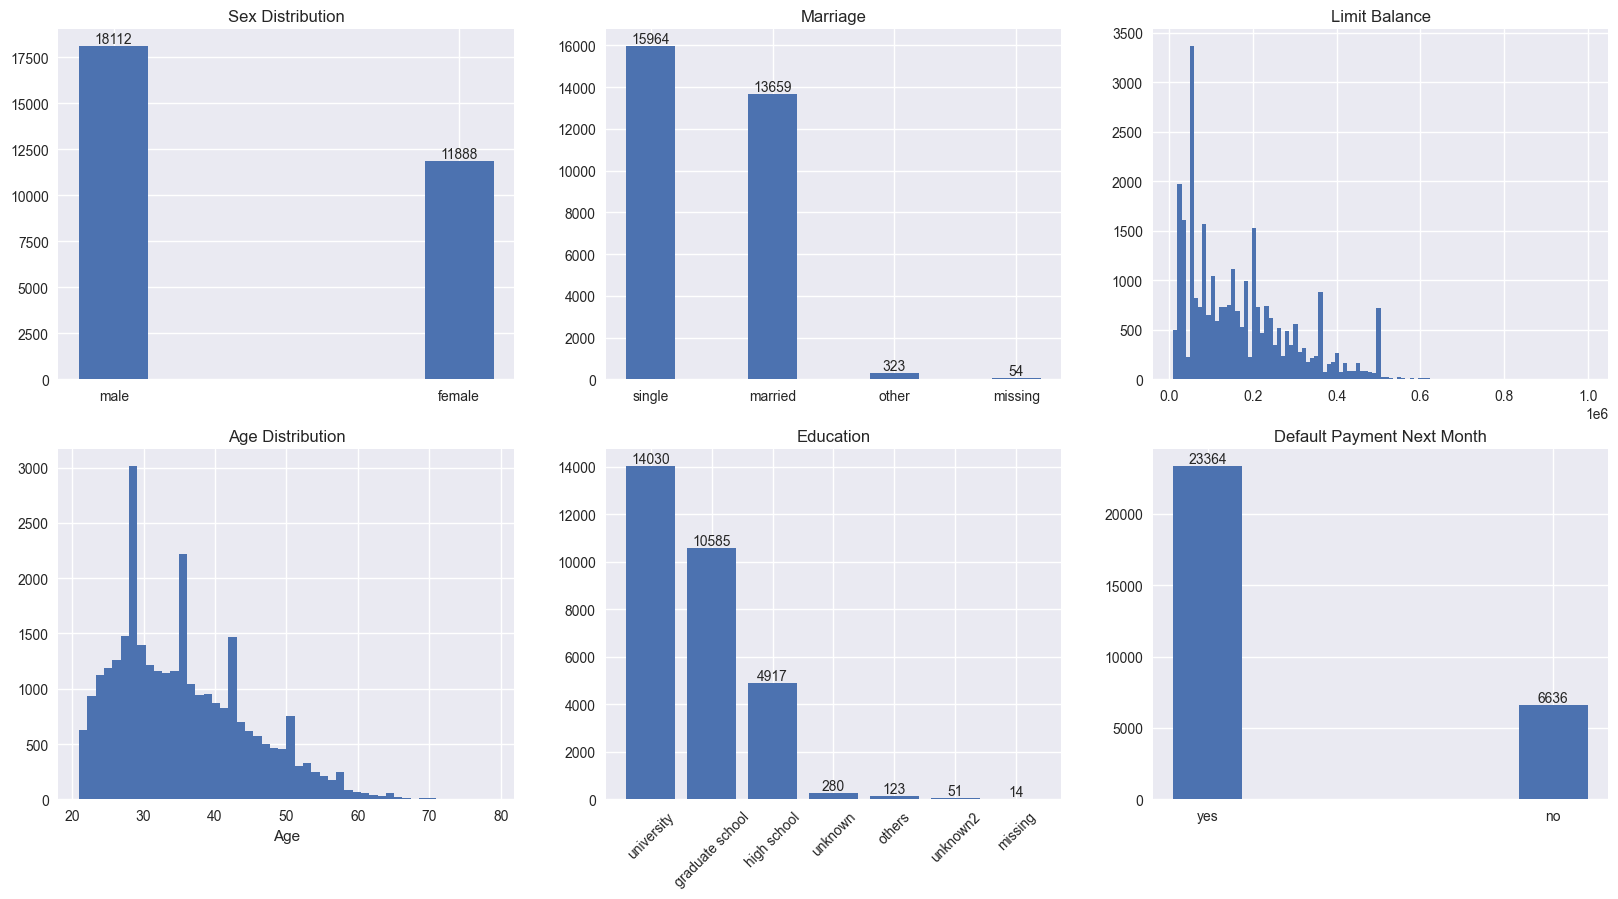

In [4]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

axs[0][0].bar(x=["male", "female"], height=df["SEX"].value_counts(), width=0.2)
axs[0][0].bar_label(axs[0][0].containers[0])
axs[0][0].set_title("Sex Distribution")

axs[0][1].bar(
    x=["single", "married", "other", "missing"],
    height=df["MARRIAGE"].value_counts(),
    width=0.4,
)
axs[0][1].bar_label(axs[0][1].containers[0])
axs[0][1].set_title("Marriage")

axs[1][0].hist(df["AGE"], bins=50)
axs[1][0].set_xlabel("Age")
axs[1][0].set_title("Age Distribution")

l = [
    "university",
    "graduate school",
    "high school",
    "unknown",
    "others",
    "unknown2",
    "missing",
]
axs[1][1].bar(x=np.arange(len(l)), height=df["EDUCATION"].value_counts())
axs[1][1].set_xticks(ticks=np.arange(len(l)), labels=l, rotation=45)
axs[1][1].bar_label(axs[1][1].containers[0])
axs[1][1].set_title("Education")

axs[0][2].hist(df["LIMIT_BAL"], bins=100)
axs[0][2].set_title("Limit Balance")

axs[1][2].bar(
    x=["yes", "no"], height=df["default.payment.next.month"].value_counts(), width=0.2
)
axs[1][2].bar_label(axs[1][2].containers[0])
axs[1][2].set_title("Default Payment Next Month")

plt.show()

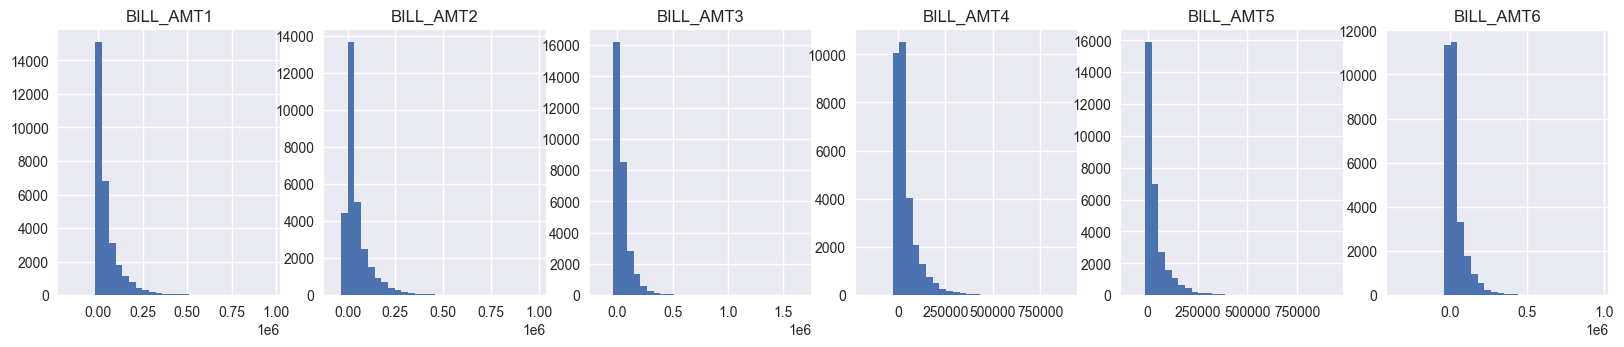

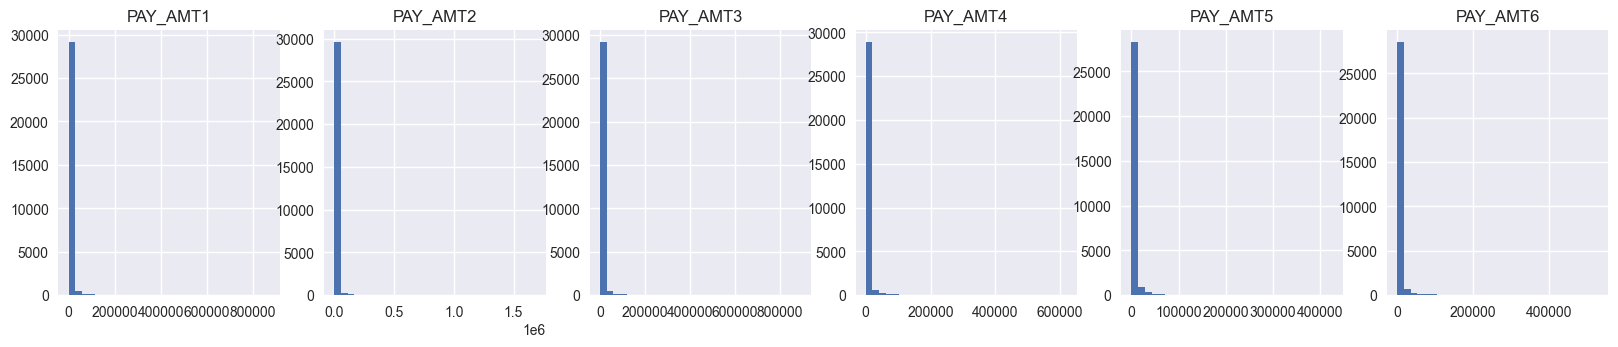

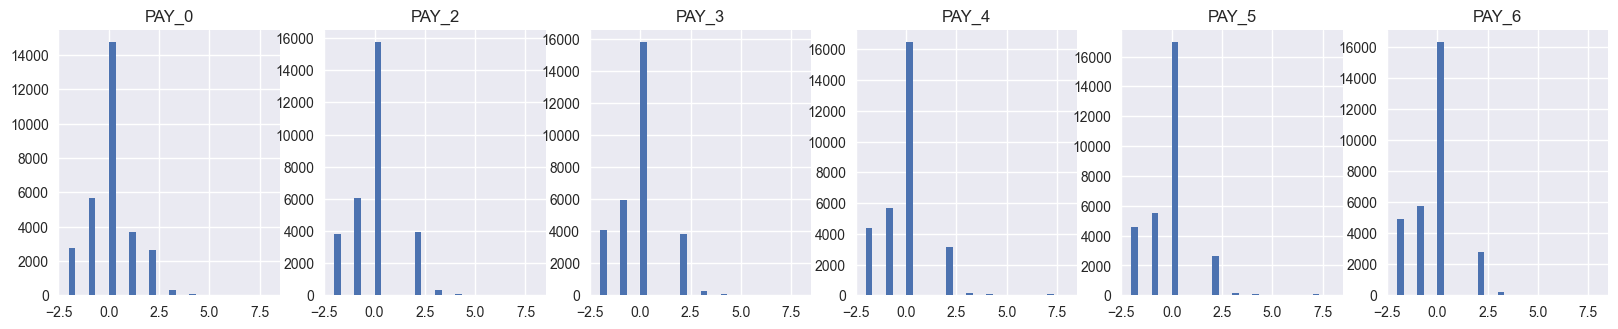

In [5]:
def draw_histograms(
    df: pd.DataFrame, variables: list[str], n_rows: int, n_cols: int, n_bins: int
):
    fig = plt.figure(figsize=(20, 20))
    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows,n_cols, i + 1)
        df[var_name].hist(bins=n_bins, ax=ax)
        ax.set_title(var_name)
    #fig.tight_layout()
    plt.show()


bills = ['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
payments = ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
late = ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

draw_histograms(df, bills, 5, 6, 30)
draw_histograms(df, payments, 5, 6, 30)
draw_histograms(df, late, 5, 6, 30)

In [6]:
def feature_default_distribution_categorial(df, feature, percentage=False):
    """Plot the distribution of default payment next month for a given categorial feature.
    """
    grouped = df.groupby([feature, "default.payment.next.month"]).size().unstack()

    # create plot
    _, ax = plt.subplots()
    width = 0.35
    x_labels = grouped.index
    x = pd.Series(range(len(x_labels)))

    total = grouped[0] + grouped[1]

    ax.bar(
        x - width / 2,
        grouped[0],
        width,
        label="No",
    )
    ax.bar(
        x + width / 2,
        grouped[1],
        width,
        label="Yes",
    )

    ax.set_xticks(x)
    ax.set_xticklabels(x_labels)
    ax.legend()
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")

    plt.show()

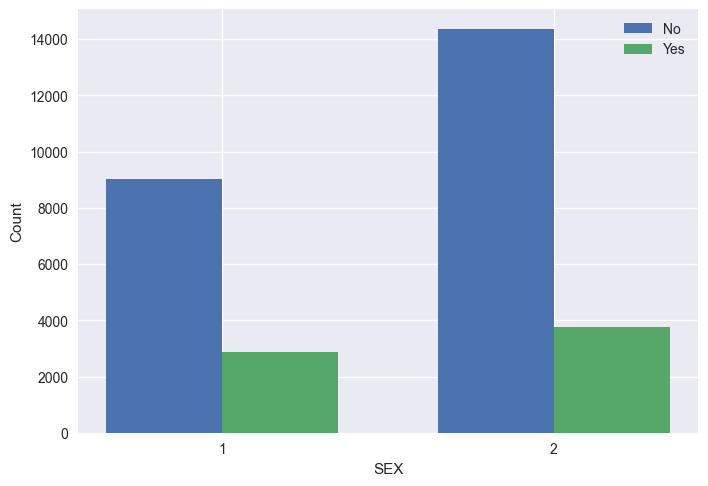

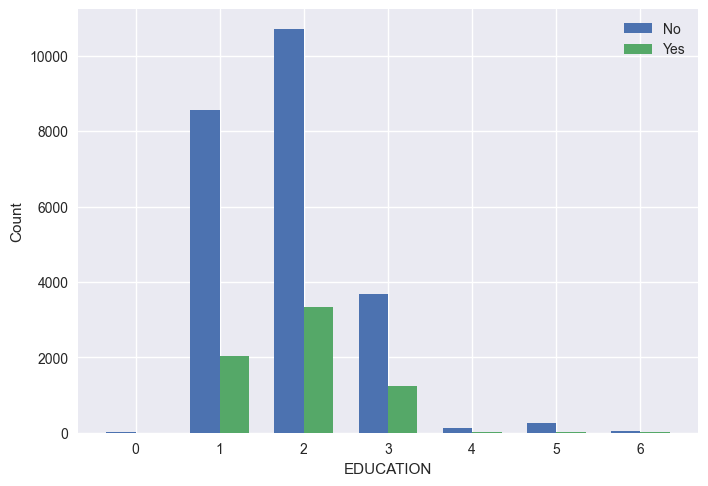

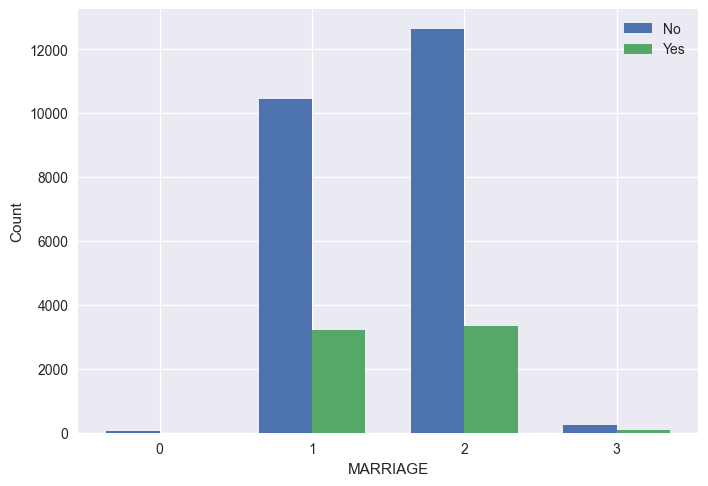

In [7]:
feature_default_distribution_categorial(df, "SEX")
feature_default_distribution_categorial(df, "EDUCATION")
feature_default_distribution_categorial(df, "MARRIAGE")

In [10]:
def feature_default_distribution_continuous(df: pd.DataFrame, feature: str, bins: int = 50):
    """Plot the distribution of default payment next month for a given numerical feature.
    """
    _, ax = plt.subplots()
    ax.hist(df[df["default.payment.next.month"] == 0][feature], bins=bins, alpha=0.5, label="No")
    ax.hist(df[df["default.payment.next.month"] == 1][feature], bins=bins, alpha=0.5, label="Yes")
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")
    ax.legend()
    ax.set_title(f"{feature} Distribution between Default and Non-Default")
    plt.show()

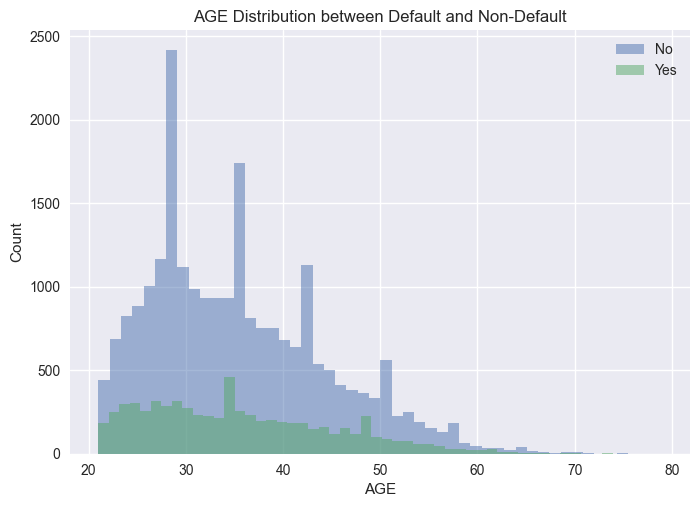

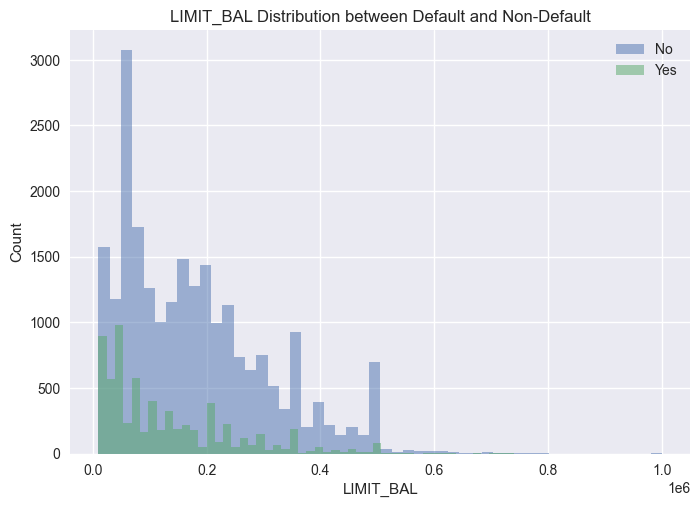

In [11]:
feature_default_distribution_continuous(df, "AGE")
feature_default_distribution_continuous(df, "LIMIT_BAL")

In [12]:
def corr_2_cols(Col1, Col2):
    res = df.groupby([Col1, Col2]).size().unstack()
    res['perc'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res


display(corr_2_cols("SEX", "default.payment.next.month"))
display(corr_2_cols("EDUCATION", "default.payment.next.month"))
display(corr_2_cols("MARRIAGE", "default.payment.next.month"))

default.payment.next.month,0,1,perc
SEX,,,
1,9015,2873,0.241672
2,14349,3763,0.207763


default.payment.next.month,0,1,perc
EDUCATION,,,
0,14.0,NaN,NaN
1,8549.0,2036.0,0.192348
2,10700.0,3330.0,0.237349
3,3680.0,1237.0,0.251576
4,116.0,7.0,0.056911
5,262.0,18.0,0.064286
6,43.0,8.0,0.156863


default.payment.next.month,0,1,perc
MARRIAGE,,,
0,49,5,0.092593
1,10453,3206,0.234717
2,12623,3341,0.209283
3,239,84,0.260062
